<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/NaverShopping_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 41.6 MB/s 
     |████████████████████████████████| 86 kB 5.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  58883      0 --:--:-- --:--:-- --:--:-- 58883


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0   109M      0 --:--:-- --:--:-- --:--:--  109M


In [5]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(4)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...


In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
len(total_data)

199908

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

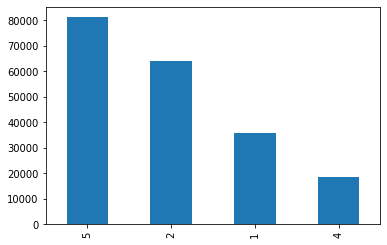

In [11]:
y_data.value_counts().plot(kind='bar')

#NLP

In [12]:
type(x_train)

pandas.core.series.Series

In [13]:
x_train.str.replace('[^ㄱ-힣 ]','')   # ^ 꼭 필요

77106                                               린넨향 좋아요
21858      편하고 좋은데 상당히 얇네요ㅎㅎ 처음뜯었을때부터 근데 냄새가넘심해요ㅜㅜ 그래도잘입을께요
20332                                        그값을함별로임 균형도안맞음
146112                  딸래미가 낙지젓갈먹고싶다해서 기숙사로보냈는데 맛이없다고하네요 ㅠ
174971                        저렴한게 비지떡이라고 이런거 좀 안팔았으면 좋겠습니다
                                ...                        
52548                                       조금 비리고 간장이달아요 ㅠ
180733                           색상은 다양하게 왔는데 크기가 고르지 않아여 ㅠ
68536                                  그저 그래요 프로가 아니라 실망이에요
148601                 일주일 썼을때 다리 한쪽 망가졌네요 높이가 달라졌어요 엄청 약해요
90836     리뉴얼되기전 투명했던 상품이 저에게 맞았는데 이제품은 별루네요 한여름에 바디에만 발...
Name: reviews, Length: 149931, dtype: object

In [14]:
from konlpy.tag import Mecab

In [15]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [16]:
x_train_small = x_train[0:5000]

In [17]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])
 
sentance

[['린', '넨', '향', '좋', '아요', '~'],
 ['편하',
  '좋',
  '은데',
  '상당히',
  '얇',
  '네요',
  'ㅎㅎ',
  '처음',
  '뜯',
  '었',
  '때',
  '부터',
  '근데',
  '냄새',
  '넘',
  '심',
  '해요',
  'ㅜㅜ',
  '그래도',
  '잘',
  '입',
  '을께요'],
 ['그', '값', '함', '.', '..', '별로', '.', '.', '균형', '안', '맞', '음'],
 ['딸래미',
  '낙지',
  '젓갈',
  '먹',
  '싶',
  '해서',
  '기숙사',
  '로',
  '보냈',
  '는데',
  '맛',
  '없',
  '다고',
  '네요',
  'ㅠ'],
 ['저렴', '비지떡', '라고', '이런', '거', '좀', '안', '팔', '았', '으면', '좋', '겠', '습니다'],
 ['재',
  '구매',
  '매번',
  '시켜',
  '먹',
  '제품',
  '입니다',
  '.',
  '밀크티',
  '용',
  '으로',
  '딱',
  '입',
  'ㄴ다',
  '.'],
 ['재', '구매', '너무', '많', '있', '어요', '번', '째', '구매', '요'],
 ['빠른',
  '배송',
  '그러나',
  '펜',
  '자',
  '있',
  '음',
  '내',
  '장고',
  '메모',
  '용',
  '으로',
  '쓰',
  '려고',
  '메모',
  '보드',
  '자석',
  '펜',
  '2',
  '개',
  '구매',
  '했',
  '는데요',
  ',',
  '저석',
  '펜',
  '2',
  '개',
  '중',
  '하나',
  '자석',
  '빠진',
  '체',
  '로',
  '와서',
  '무용지물',
  '네요',
  '.',
  '...',
  '다시',
  '보내',
  '주',
  '실',
  '수',
  '있',
  '으신',
  '가요',
  '?'

# Tokenizer

In [18]:
print(sentance)

[['린', '넨', '향', '좋', '아요', '~'], ['편하', '좋', '은데', '상당히', '얇', '네요', 'ㅎㅎ', '처음', '뜯', '었', '때', '부터', '근데', '냄새', '넘', '심', '해요', 'ㅜㅜ', '그래도', '잘', '입', '을께요'], ['그', '값', '함', '.', '..', '별로', '.', '.', '균형', '안', '맞', '음'], ['딸래미', '낙지', '젓갈', '먹', '싶', '해서', '기숙사', '로', '보냈', '는데', '맛', '없', '다고', '네요', 'ㅠ'], ['저렴', '비지떡', '라고', '이런', '거', '좀', '안', '팔', '았', '으면', '좋', '겠', '습니다'], ['재', '구매', '매번', '시켜', '먹', '제품', '입니다', '.', '밀크티', '용', '으로', '딱', '입', 'ㄴ다', '.'], ['재', '구매', '너무', '많', '있', '어요', '번', '째', '구매', '요'], ['빠른', '배송', '그러나', '펜', '자', '있', '음', '내', '장고', '메모', '용', '으로', '쓰', '려고', '메모', '보드', '자석', '펜', '2', '개', '구매', '했', '는데요', ',', '저석', '펜', '2', '개', '중', '하나', '자석', '빠진', '체', '로', '와서', '무용지물', '네요', '.', '...', '다시', '보내', '주', '실', '수', '있', '으신', '가요', '?'], ['사진', '상', '하고', '똑같', '아요', '.', '사업', '번창', '시', '종종', '들릴', '용', '수고', '세요', '.', '..^^'], ['남편', '번', '시켜', '라고', '해서', '효모', '시켰', '네요', '남편', '친구', '먹', '던', '거', '라', '추천', '받', '아서', '먹',

In [19]:
import tensorflow as tf

In [20]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)

In [21]:
tokenizer.word_index

{'.': 1,
 '네요': 2,
 '좋': 3,
 '어요': 4,
 '는데': 5,
 '아요': 6,
 '잘': 7,
 '안': 8,
 '있': 9,
 '구매': 10,
 '배송': 11,
 '했': 12,
 '너무': 13,
 '습니다': 14,
 '같': 15,
 '어': 16,
 '거': 17,
 '!': 18,
 '먹': 19,
 '되': 20,
 '합니다': 21,
 '재': 22,
 '요': 23,
 '쓰': 24,
 '기': 25,
 '없': 26,
 '아': 27,
 '~': 28,
 '않': 29,
 '나': 30,
 '것': 31,
 '..': 32,
 '로': 33,
 '보다': 34,
 '았': 35,
 '사용': 36,
 '주': 37,
 '겠': 38,
 '해서': 39,
 '해': 40,
 '보': 41,
 '으로': 42,
 '면': 43,
 '가격': 44,
 '어서': 45,
 '주문': 46,
 '만': 47,
 '아서': 48,
 '해요': 49,
 '었': 50,
 '제품': 51,
 ',': 52,
 '그냥': 53,
 '지만': 54,
 '서': 55,
 '만족': 56,
 '생각': 57,
 '좀': 58,
 '입니다': 59,
 '니': 60,
 '많이': 61,
 '라': 62,
 '받': 63,
 '시': 64,
 '더': 65,
 '할': 66,
 '맛': 67,
 '개': 68,
 '별로': 69,
 '때': 70,
 '샀': 71,
 '번': 72,
 '사': 73,
 '맛있': 74,
 '음': 75,
 '빠르': 76,
 '에서': 77,
 '?': 78,
 '왔': 79,
 '사이즈': 80,
 '수': 81,
 'ㅠㅠ': 82,
 '입': 83,
 '던': 84,
 '다른': 85,
 '맞': 86,
 '정말': 87,
 'ㅠ': 88,
 '작': 89,
 '세요': 90,
 '상품': 91,
 '괜찮': 92,
 '포장': 93,
 '저렴': 94,
 '아주': 95,
 '두': 96,
 '부분'

In [22]:
tokenizer.word_counts

OrderedDict([('린', 5),
             ('넨', 3),
             ('향', 63),
             ('좋', 1639),
             ('아요', 1001),
             ('~', 400),
             ('편하', 83),
             ('은데', 92),
             ('상당히', 6),
             ('얇', 70),
             ('네요', 1667),
             ('ㅎㅎ', 129),
             ('처음', 98),
             ('뜯', 42),
             ('었', 297),
             ('때', 206),
             ('부터', 29),
             ('근데', 59),
             ('냄새', 121),
             ('넘', 125),
             ('심', 9),
             ('해요', 298),
             ('ㅜㅜ', 92),
             ('그래도', 60),
             ('잘', 861),
             ('입', 173),
             ('을께요', 9),
             ('그', 75),
             ('값', 19),
             ('함', 68),
             ('.', 3860),
             ('..', 350),
             ('별로', 209),
             ('균형', 4),
             ('안', 849),
             ('맞', 163),
             ('음', 190),
             ('딸래미', 1),
             ('낙지', 6),
             ('젓갈', 6),
   

In [23]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어 수

In [24]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8117, 5352, 65.93569052605642, 7.797231512670056)

In [25]:
vocab_size = total_cnt - rare_cnt

In [26]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

후기

In [27]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '네요',
 4: '좋',
 5: '어요',
 6: '는데',
 7: '아요',
 8: '잘',
 9: '안',
 10: '있',
 11: '구매',
 12: '배송',
 13: '했',
 14: '너무',
 15: '습니다',
 16: '같',
 17: '어',
 18: '거',
 19: '!',
 20: '먹',
 21: '되',
 22: '합니다',
 23: '재',
 24: '요',
 25: '쓰',
 26: '기',
 27: '없',
 28: '아',
 29: '~',
 30: '않',
 31: '나',
 32: '것',
 33: '..',
 34: '로',
 35: '보다',
 36: '았',
 37: '사용',
 38: '주',
 39: '겠',
 40: '해서',
 41: '해',
 42: '보',
 43: '으로',
 44: '면',
 45: '가격',
 46: '어서',
 47: '주문',
 48: '만',
 49: '아서',
 50: '해요',
 51: '었',
 52: '제품',
 53: ',',
 54: '그냥',
 55: '지만',
 56: '서',
 57: '만족',
 58: '생각',
 59: '좀',
 60: '입니다',
 61: '니',
 62: '많이',
 63: '라',
 64: '받',
 65: '시',
 66: '더',
 67: '할',
 68: '맛',
 69: '개',
 70: '별로',
 71: '때',
 72: '샀',
 73: '번',
 74: '사',
 75: '맛있',
 76: '음',
 77: '빠르',
 78: '에서',
 79: '?',
 80: '왔',
 81: '사이즈',
 82: '수',
 83: 'ㅠㅠ',
 84: '입',
 85: '던',
 86: '다른',
 87: '맞',
 88: '정말',
 89: 'ㅠ',
 90: '작',
 91: '세요',
 92: '상품',
 93: '괜찮',
 94: '포장',
 95: '저렴',
 96: '아주',
 97

In [28]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [29]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(6, 13, 24)

In [30]:
hist_len = [len(words) for words in x_train_small]

(array([ 12.,  43., 478., 346., 337., 622., 275., 210., 367., 164., 140.,
        249., 121.,  79., 189.,  96.,  92., 152.,  55.,  56., 128.,  40.,
         48.,  97.,  45.,  46.,  83.,  29.,  42.,  75.,  34.,  16.,  34.,
         24.,  23.,  37.,  21.,  12.,  27.,   7.,  10.,  17.,   8.,   4.,
          3.,   2.,   1.,   2.,   1.,   1.]),
 array([ 1.  ,  2.34,  3.68,  5.02,  6.36,  7.7 ,  9.04, 10.38, 11.72,
        13.06, 14.4 , 15.74, 17.08, 18.42, 19.76, 21.1 , 22.44, 23.78,
        25.12, 26.46, 27.8 , 29.14, 30.48, 31.82, 33.16, 34.5 , 35.84,
        37.18, 38.52, 39.86, 41.2 , 42.54, 43.88, 45.22, 46.56, 47.9 ,
        49.24, 50.58, 51.92, 53.26, 54.6 , 55.94, 57.28, 58.62, 59.96,
        61.3 , 62.64, 63.98, 65.32, 66.66, 68.  ]),
 <a list of 50 Patch objects>)

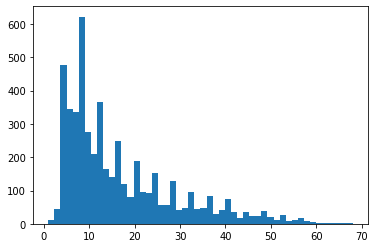

In [31]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

In [32]:
sum(hist_len) / len(x_train_small)

16.8034

In [33]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [34]:
y_train_small = y_train[0:5000]

In [36]:
# y_train_small[6]

In [35]:
# y_train_small[6] = 3

In [37]:
import numpy as np

In [38]:
y_train_small = np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [39]:
len(x_train_small), len(y_train_small)

(5000, 5000)

In [40]:
# y_train_onehot = tf.keras.utils.to_categorical(y_train_small)
# len(y_train_onehot[5])

In [41]:
# len(y_train_onehot[5]), y_train_onehot[5]

# make model

In [48]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50)) # input layer
# model.add(tf.keras.layers.LSTM(128)) # hidden layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden layer
# model.add(tf.keras.layers.GRU(128)) # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax')) # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) # gadget

In [49]:
hist = model.fit(x_train_small, y_train_small, epochs=2, batch_size=256, validation_split=0.3)

Epoch 1/2
14/14 [==============================] - 11s 530ms/step - loss: 1.4531 - acc: 0.3974 - val_loss: 1.3142 - val_acc: 0.3980
Epoch 2/2
14/14 [==============================] - 6s 462ms/step - loss: 1.2717 - acc: 0.4069 - val_loss: 1.2631 - val_acc: 0.3593


In [ ]:
# model.evaluate(x_train_small, y_train_small) # LSTM(128) - loss: 0.9170 - acc: 0.8500

In [45]:
# model.evaluate(x_train_small, y_train_small) # GRU - loss: 0.9265 - acc: 0.8436

In [46]:
# model.evaluate(x_train_small, y_train_small) # Bidirectional(LSTM(128)) - loss: 0.8787 - acc: 0.8382